# Pandas Baiscs <hr style="border:2.5px solid#ff7f50"></hr>

Data Analyst: Bryx V. Agravante <br>
Department: Electrical Engineering

# Data Frame

In [1]:
# %pip install pandas --upgrade

In [2]:
# %pip install matplotlib --upgrade

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [4]:
data = {
    'name':['Agravante','Christian','Charles'],
    'Age':[20, 19, 20],
    'Sex':['M','M','M']
}
data

{'name': ['Agravante', 'Christian', 'Charles'],
 'Age': [20, 19, 20],
 'Sex': ['M', 'M', 'M']}

In [5]:
df = pd.DataFrame(data)
df

,name,Age,Sex
0,Agravante,20,M
1,Christian,19,M
2,Charles,20,M


In [6]:
df['name']

0    Agravante
1    Christian
2      Charles
Name: name, dtype: object

In [7]:
df['Sex']

0    M
1    M
2    M
Name: Sex, dtype: object

In [8]:
df['Age']

0    20
1    19
2    20
Name: Age, dtype: int64

In [9]:
df['Age'].sum()

np.int64(59)

In [10]:
df['Age'].mean()

np.float64(19.666666666666668)

# Correlation

In [11]:
device = {
    "current":[2.0,3.5,1.8,4.2,2.7],
    "power":[100,200,90,210,110]
}
device

{'current': [2.0, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [12]:
cp = pd.DataFrame(device)
cp

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [13]:
cp.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [14]:
cp.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [15]:
cp['current']

0    2.0
1    3.5
2    1.8
3    4.2
4    2.7
Name: current, dtype: float64

In [16]:
cp['power']

0    100
1    200
2     90
3    210
4    110
Name: power, dtype: int64

In [17]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   current  5 non-null      float64
 1   power    5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes


In [18]:
cp.head()

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [19]:
cp.tail()

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [20]:
cp.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter plot

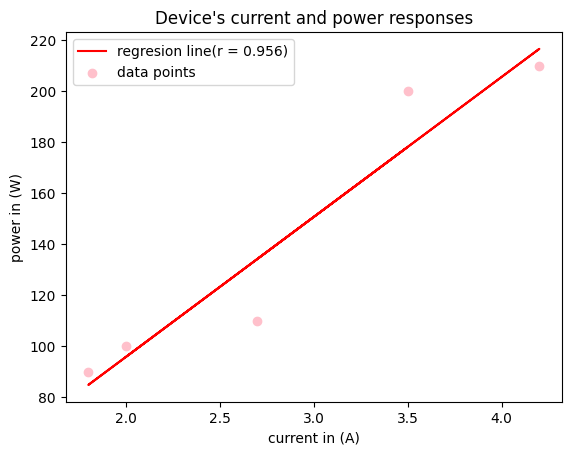

In [21]:
x = cp["current"]
y = cp["power"]

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)

line = m*x + b
plt.plot(x,line,
         color='r',
         label=f'regresion line(r = {r:.3f})')

# scatter
plt.scatter(x,y,
            color='pink',
            label='data points')
plt.title("Device's current and power responses")
plt.ylabel('power in (W)')
plt.xlabel('current in (A)')
plt.legend()
plt.show()

In [22]:
type(m)

numpy.float64

In [23]:
type(x)

pandas.core.series.Series

# Resistance test

In [24]:
resistance = pd.read_csv("resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [25]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [26]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [27]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [28]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

In [29]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [30]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


# Bar Graph

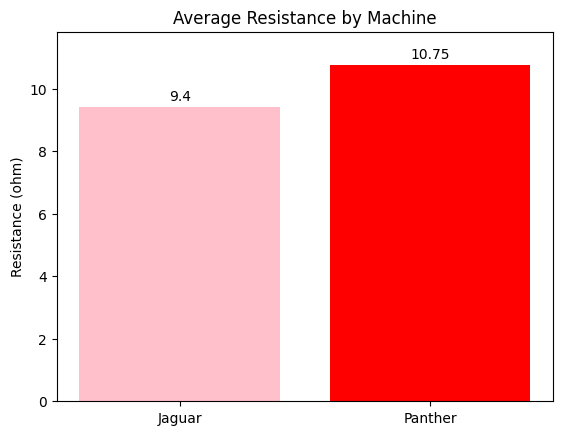

In [31]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean,pan_mean],
        color=['pink','red'])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

# bar label
plt.bar_label(bars, padding=3)
plt.margins(y=0.1)
plt.show()